In [36]:
# Import our dependencies
import pandas as pd
from pathlib import Path
import datetime as dt
import matplotlib.pyplot as plt
import hvplot.pandas
import time

In [37]:
# Read cleaned file
file_path = "../Resources/14100328.csv"
data = pd.read_csv(file_path, error_bad_lines=False)
print(data.shape)
print(data.sample(5))

/Users/oi/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(27338080, 17)
         REF_DATE                        GEO           DGUID  \
26615304  2021-04                     Quebec     2016A000224   
617006    2015-01                   Manitoba     2016A000246   
51672     2015-01                     Canada  2016A000011124   
3545591   2015-10  Newfoundland and Labrador     2016A000210   
3585363   2015-10  Newfoundland and Labrador     2016A000210   

                       National Occupational Classification  \
26615304  Animal health technologists and veterinary tec...   
617006               Financial sales representatives [6235]   
51672                                        Cashiers [661]   
3545591    Social and community service professionals [415]   
3585363                              Foundry workers [9412]   

                          Job vacancy characteristics     Statistics     UOM  \
26615304    Continuity of recruitment, all categories  Job vacancies  Number   
617006                                Company website  Job va

In [40]:
df=data.copy()

In [41]:
# Determine Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27338080 entries, 0 to 27338079
Data columns (total 17 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   REF_DATE                              object 
 1   GEO                                   object 
 2   DGUID                                 object 
 3   National Occupational Classification  object 
 4   Job vacancy characteristics           object 
 5   Statistics                            object 
 6   UOM                                   object 
 7   UOM_ID                                int64  
 8   SCALAR_FACTOR                         object 
 9   SCALAR_ID                             int64  
 10  VECTOR                                object 
 11  COORDINATE                            object 
 12  VALUE                                 float64
 13  STATUS                                object 
 14  SYMBOL                                float64
 15  TERMINATED   

<h1><span style="color:blue"> 1. Exploring columns </span></h1>

In [42]:
# Exploring columns
df.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'National Occupational Classification',
       'Job vacancy characteristics', 'Statistics', 'UOM', 'UOM_ID',
       'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS',
       'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [43]:
# df['REF_DATE'].value_counts().sort_index(ascending=True)
df['REF_DATE'].unique()

array(['2015-01', '2015-04', '2015-07', '2015-10', '2016-01', '2016-04',
       '2016-07', '2016-10', '2017-01', '2017-04', '2017-07', '2017-10',
       '2018-01', '2018-04', '2018-07', '2018-10', '2019-01', '2019-04',
       '2019-07', '2019-10', '2020-01', '2020-10', '2021-01', '2021-04'],
      dtype=object)

In [44]:
# Exploring columns
df["GEO"].value_counts()

Canada                       1967467
Ontario                      1965584
Quebec                       1964940
British Columbia             1964009
Alberta                      1962077
Manitoba                     1956799
Saskatchewan                 1954265
Nova Scotia                  1954041
New Brunswick                1952221
Newfoundland and Labrador    1948525
Prince Edward Island         1938900
Northwest Territories        1937206
Yukon                        1937164
Nunavut                      1934882
Name: GEO, dtype: int64

In [48]:
# Exploring columns
df.DGUID.unique()

array(['2016A000011124', '2016A000210', '2016A000211', '2016A000212',
       '2016A000213', '2016A000224', '2016A000235', '2016A000246',
       '2016A000247', '2016A000248', '2016A000259', '2016A000260',
       '2016A000261', '2016A000262'], dtype=object)

In [96]:
# Exploring columns
# df["National Occupational Classification"].value_counts()
sorted(df['National Occupational Classification'].unique().tolist())

['Accommodation service managers [0632]',
 'Accommodation, travel, tourism and related services supervisors [6313]',
 'Accounting and related clerks [1431]',
 'Accounting technicians and bookkeepers [1311]',
 'Actors and comedians [5135]',
 'Administrative and financial supervisors and administrative occupations [12]',
 'Administrative and regulatory occupations [122]',
 'Administrative assistants [1241]',
 'Administrative officers [1221]',
 'Administrative services managers [011]',
 'Administrative services supervisors [121]',
 'Administrators - post-secondary education and vocational training [0421]',
 'Advertising, marketing and public relations managers [0124]',
 'Aerospace engineers [2146]',
 'Agricultural and fish products inspectors [2222]',
 'Agricultural representatives, consultants and specialists [2123]',
 'Agricultural service contractors, farm supervisors and specialized livestock workers [8252]',
 'Agriculture and horticulture workers [843]',
 'Air pilots, flight engineer

In [47]:
# Number of unique NOC Codes
len(df['National Occupational Classification'].unique())

692

In [72]:
# # Exploring columns
sorted(df['Job vacancy characteristics'].unique().tolist())

['1 year to less than 3 years',
 '120 days or more',
 '15 to 29 days',
 '3 years to less than 5 years',
 '30 to 59 days',
 '5 years to less than 8 years',
 '60 to 89 days',
 '8 years or more',
 '90 days or more',
 '90 to 119 days',
 'A professional or other type of certification is required',
 "Bachelor's degree",
 'Certification requirement, all types',
 'College, CEGEP and other non-university certificate or diploma',
 'Company website',
 'Constantly recruiting',
 'Continuity of recruitment, all categories',
 'Duration of job vacancy, all durations',
 'Full-time',
 'Government employment centre or website',
 'High school diploma or equivalent',
 'Job or recruitment fairs at schools, colleges or universities',
 'Less than 1 year',
 'Less than 15 days',
 'Minimum experience level sought, all levels',
 'Minimum level of education required, all levels',
 'Newspaper ads',
 'No minimum level of education required',
 'No professional or other type of certification required',
 'Non-universit

In [50]:
# Exploring columns
df.Statistics.value_counts()

Job vacancies                  10036768
Proportion of job vacancies     9822176
Average offered hourly wage     7479136
Name: Statistics, dtype: int64

In [51]:
# Exploring columns
df.UOM.unique()

array(['Number', 'Percentage', 'Dollars'], dtype=object)

In [54]:
# Exploring columns
df.UOM_ID.unique()

array([223, 242,  81])

In [55]:
# Exploring columns
df.SCALAR_FACTOR.unique()

array(['units'], dtype=object)

In [56]:
# Exploring columns
df.SCALAR_ID.unique()

array([0])

In [57]:
# Exploring columns
df.VECTOR.unique()

array(['v104496271', 'v104496272', 'v104496273', ..., 'v1230872619',
       'v1230921059', 'v1230824179'], dtype=object)

In [58]:
# Exploring columns
df['COORDINATE'].value_counts

<bound method IndexOpsMixin.value_counts of 0              1.1.1.1
1              1.1.1.2
2              1.1.1.5
3              1.1.2.1
4              1.1.2.2
               ...    
27338075    14.12.42.2
27338076    14.12.43.1
27338077    14.12.43.2
27338078    14.12.44.1
27338079    14.12.44.2
Name: COORDINATE, Length: 27338080, dtype: object>

In [59]:
# Exploring columns
df['STATUS'].value_counts()

..    11028069
x      5380011
F      4070335
A      1186813
D      1173461
E      1024978
B       802533
C       625127
Name: STATUS, dtype: int64

In [60]:
# Exploring columns
df.SYMBOL.unique()

array([nan])

In [61]:
# Exploring columns
df.TERMINATED.unique()

array([nan, 't'], dtype=object)

In [62]:
# Exploring columns
df.DECIMALS.unique()

array([0, 1, 2])

In [63]:
# Dropping unneeded columns from table
df = df.drop(columns=['DGUID','UOM_ID','SCALAR_FACTOR','SCALAR_ID','VECTOR','COORDINATE','STATUS','SYMBOL','TERMINATED','DECIMALS'])

<h1><span style="color:blue"> 2. Exploring Statistics column: Job Vacancies </span></h1>

In [64]:
# Filter number of vacancies
job_vacancies = df.loc[df['Statistics'] == "Job vacancies"] 
job_vacancies.shape

(10036768, 7)

In [65]:
# Handle Missing Data
job_vacancies.dropna(subset = ["VALUE"], inplace=True)
job_vacancies.shape

/Users/oi/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(2098409, 7)

/Users/oi/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


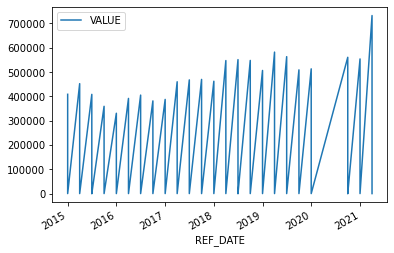

In [67]:
# Ploting Value
job_vacancies['REF_DATE'] = pd.to_datetime(job_vacancies['REF_DATE'], format='%Y-%m')
job_vacancies.plot(x='REF_DATE', y='VALUE')
plt.show()

In [69]:
# Total vacancies per province by ref date 
total_vacancies_by_location = job_vacancies.groupby(["GEO","REF_DATE"]).agg(total_vac=('VALUE','sum'))
total_vacancies_by_location

total_vac
GEO     REF_DATE             
Alberta 2015-01-01   930435.0
        2015-04-01  5257125.0
        2015-07-01  4640070.0
        2015-10-01  3709010.0
        2016-01-01  2695035.0
...                       ...
Yukon   2019-10-01    38295.0
        2020-01-01    32040.0
        2020-10-01    30790.0
        2021-01-01    35945.0
        2021-04-01    57155.0

[336 rows x 1 columns]

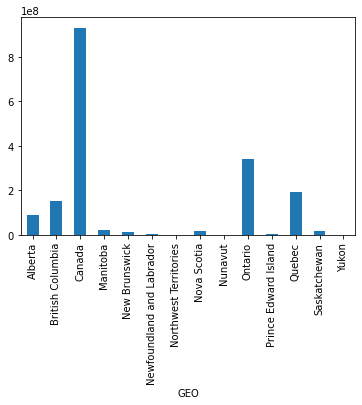

In [84]:
# Exploring GEO
job_vacancies=job_vacancies.reset_index()
job_vacancies.groupby('GEO')['VALUE'].sum().plot(kind='bar')
plt.show()

In [85]:
# Filtering GEO.Canada
job_vacancies = df.loc[df['GEO'] != "Canada"] 
job_vacancies.shape

(25370613, 7)

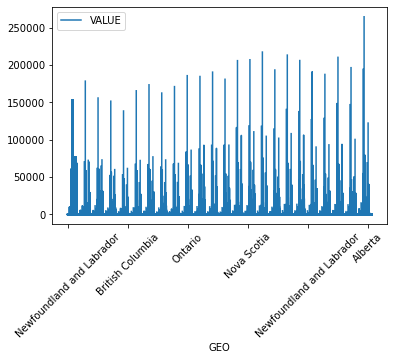

In [89]:
# Exloring JV without GEO Canada
ax = plt.gca()
job_vacancies.plot(kind='line',x='GEO',y='VALUE', ax=ax)
plt.xticks(rotation=45)
plt.show()

In [70]:
# Total NOC vacancies by Date
total_NOC_vacancies = job_vacancies.groupby(["REF_DATE","National Occupational Classification"]).agg(total_vac=('VALUE','sum'))
total_NOC_vacancies

total_vac
REF_DATE   National Occupational Classification                         
2015-01-01 Accommodation service managers [0632]                     0.0
           Accommodation, travel, tourism and related serv...        0.0
           Accounting and related clerks [1431]                  16130.0
           Accounting technicians and bookkeepers [1311]             0.0
           Administrative and financial supervisors and ad...   164480.0
...                                                                  ...
2021-04-01 Web designers and developers [2175]                   36910.0
           Welders and related machine operators [7237]         151160.0
           Woodworking machine operators [9437]                  12410.0
           Workers in natural resources, agriculture and r...   373495.0
           Writing, translating and related communications...    28325.0

[14910 rows x 1 columns]

In [94]:
# Filtering NOC 1 level
inc_list = ['Business, finance and administration occupations [1]', \
            'Health occupations [3]', \
            'Management occupations [0]', 'Natural and applied sciences and related occupations [2]', \
            'Natural resources, agriculture and related production occupations [8]', \
            'Occupations in art, culture, recreation and sport [5]', \
            'Occupations in education, law and social, community and government services [4]', \
            'Occupations in manufacturing and utilities [9]', \
            'Sales and service occupations [6]', \
            'Trades, transport and equipment operators and related occupations [7]']
job_vacancies_noc1 = job_vacancies[job_vacancies['National Occupational Classification'].isin(inc_list)]

In [95]:
# Filtering Job Job vacancy characteristics
job_vacancies_noc1 = job_vacancies_noc1.loc[(job_vacancies_noc1['Job vacancy characteristics'] == 'Full-time') | \
                          (job_vacancies_noc1['Job vacancy characteristics'] == 'Part-time')]

In [97]:
# Calculating Total Canada / Total NOC / Total Job vacancy characteristics
# Filter number of vacancies
job_vacancies_ttl = df.loc[df['Statistics'] == "Job vacancies"]
job_vacancies_ttl = job_vacancies_ttl.loc[job_vacancies_ttl['GEO'] == "Canada"] 
job_vacancies_ttl = job_vacancies_ttl.loc[job_vacancies_ttl['National Occupational Classification'] == "Total, all occupations"]
job_vacancies_ttl = job_vacancies_ttl.loc[job_vacancies_ttl['Job vacancy characteristics'] == "Type of work, all types"] 
job_vacancies_ttl

,REF_DATE,GEO,National Occupational Classification,Job vacancy characteristics,Statistics,UOM,VALUE
0,2015-01,Canada,"Total, all occupations","Type of work, all types",Job vacancies,Number,408125.0
1143184,2015-04,Canada,"Total, all occupations","Type of work, all types",Job vacancies,Number,451925.0
2286368,2015-07,Canada,"Total, all occupations","Type of work, all types",Job vacancies,Number,407865.0
3429552,2015-10,Canada,"Total, all occupations","Type of work, all types",Job vacancies,Number,358755.0
4572736,2016-01,Canada,"Total, all occupations","Type of work, all types",Job vacancies,Number,330215.0
5715920,2016-04,Canada,"Total, all occupations","Type of work, all types",Job vacancies,Number,391190.0
6859104,2016-07,Canada,"Total, all occupations","Type of work, all types",Job vacancies,Number,404860.0
8002288,2016-10,Canada,"Total, all occupations","Type of work, all types",Job vacancies,Number,381010.0
9145472,2017-01,Canada,"Total, all occupations","Type of work, all types",Job vacancies,Number,387080.0
10288656,2017-04,Canada,"Total, all occupations","Type of work, all types",Job vacancies,Number,459685.0


In [ ]:
# job_vacancies_ttl = job_vacancies_ttl.loc[job_vacancies_ttl['GEO'] == "Canada"] 

In [101]:
# Group Date_jv.Value
jv_noc_broad = job_vacancies_noc1.groupby(["REF_DATE"]).sum()["VALUE"]

In [102]:
# Group Date_jv.ttl.Value
jv_ttl = job_vacancies_ttl.groupby(["REF_DATE"]).sum()["VALUE"]

In [103]:
# difference in %
jv_join=pd.merge(jv_noc_broad, jv_ttl, how='left', on=['REF_DATE'])
jv_join['dif'] = round(((jv_join.VALUE_y / jv_join.VALUE_x)-1)*100)
jv_join

,VALUE_x,VALUE_y,dif
REF_DATE,,,
2015-01,217832.60,408125.0,87.0
2015-04,436503.50,451925.0,4.0
2015-07,406278.65,407865.0,0.0
2015-10,360000.05,358755.0,-0.0
2016-01,332016.10,330215.0,-1.0
2016-04,391474.55,391190.0,-0.0
2016-07,410681.95,404860.0,-1.0
2016-10,382382.75,381010.0,-0.0
2017-01,384001.95,387080.0,1.0


<h1><span style="color:blue"> 3. Average Hourly Wage </span></h1>

In [104]:
# Filtering Average Hourly Wage
avg_wage = df.loc[df['Statistics'] == "Average offered hourly wage"]
avg_wage.head()

,REF_DATE,GEO,National Occupational Classification,Job vacancy characteristics,Statistics,UOM,VALUE
2,2015-01,Canada,"Total, all occupations","Type of work, all types",Average offered hourly wage,Dollars,19.15
5,2015-01,Canada,"Total, all occupations",Full-time,Average offered hourly wage,Dollars,NaN
8,2015-01,Canada,"Total, all occupations",Part-time,Average offered hourly wage,Dollars,NaN
11,2015-01,Canada,"Total, all occupations","Minimum level of education required, all levels",Average offered hourly wage,Dollars,19.15
14,2015-01,Canada,"Total, all occupations",No minimum level of education required,Average offered hourly wage,Dollars,NaN


In [105]:
# Handle Missing Data
vg_wage = avg_wage.dropna(subset=['VALUE'])

In [106]:
# box plot vacancies
avg_wage.hvplot.box(y='VALUE')

:BoxWhisker   (VALUE)

In [107]:
# Average hourly wage by characteristics
avg_wage.groupby(["REF_DATE","Job vacancy characteristics"]).agg(total_vac=('VALUE','mean'))

total_vac
REF_DATE Job vacancy characteristics                                  
2015-01  1 year to less than 3 years                               NaN
         15 to 29 days                                             NaN
         3 years to less than 5 years                              NaN
         30 to 59 days                                             NaN
         5 years to less than 8 years                              NaN
...                                                                ...
2021-04  Trade certificate or diploma, or apprenticeship...  26.439872
         Type of position, all types                         26.170179
         Type of work, all types                             26.170179
         University certificate or diploma below bachelo...  31.413673
         University certificate, diploma or degree above...  42.597244

[772 rows x 1 columns]

In [108]:
avg_wage.groupby(["National Occupational Classification","REF_DATE"]).agg(avg_wage=('VALUE','mean'))

avg_wage
National Occupational Classification               REF_DATE           
Accommodation service managers [0632]              2015-01         NaN
                                                   2015-04   23.438971
                                                   2015-07   22.950917
                                                   2015-10   22.122321
                                                   2016-01   23.731481
...                                                                ...
Writing, translating and related communications... 2019-10   24.565772
                                                   2020-01   25.971333
                                                   2020-10   27.828065
                                                   2021-01   26.158984
                                                   2021-04   29.930070

[16608 rows x 1 columns]

<h1><span style="color:blue"> 4. Percent Job Vacancies </span></h1>

In [109]:
# Filtering Proportion of job vacancies
perct_vacancies = df.loc[df['Statistics'] == "Proportion of job vacancies"] 

In [110]:
# Handle Missing Data
perct_vacancies = perct_vacancies.dropna(subset=['VALUE'])

In [111]:
perct_vacancies.loc[df['GEO'] == "Ontario"].tail(5)

,REF_DATE,GEO,National Occupational Classification,Job vacancy characteristics,Statistics,UOM,VALUE
26751935,2021-04,Ontario,Unclassified occupations,"Recruitment strategies, all types",Proportion of job vacancies,Percentage,100.0
26751937,2021-04,Ontario,Unclassified occupations,"Personal contacts, referrals, informal networks",Proportion of job vacancies,Percentage,56.2
26751941,2021-04,Ontario,Unclassified occupations,Company website,Proportion of job vacancies,Percentage,80.2
26751943,2021-04,Ontario,Unclassified occupations,Online job boards,Proportion of job vacancies,Percentage,85.5
26751945,2021-04,Ontario,Unclassified occupations,Social media,Proportion of job vacancies,Percentage,53.9
